# ESPPRC cspy
This notebook is intended to test, how to use the cspy package.

In [1]:
import cspy
import networkx as nx
import numpy as np

import model

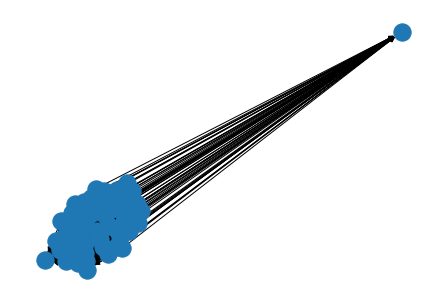

In [6]:
G = model.create_example_1().to_directed()
load = np.arange(G.number_of_nodes()-1)
G.graph['n_res'] = 2
for i in range(1,G.number_of_nodes()):
    G.add_edge("Source",i, weight=G.edges[0,i]['weight'])

G.remove_edges_from(list(G.edges(0)))   
 
for (u,v) in G.edges():
    if 0 < v <= load.size:
        G[u][v]['res_cost'] = np.array([G.nodes()[v]["demand"],0])
    else:
        G[u][v]['res_cost'] = np.array([0,0])
G = nx.relabel_nodes(G,{0:"Sink"}) 
nx.draw(G)

In [3]:
G[1][2]['res_cost']

array([1, 0])

In [4]:
G.nodes()
print(G.graph['capacity'])

3


In [7]:
alg = cspy.BiDirectional(G, [G.graph['capacity'],1], [0,0], elementary=True)
alg.run()
print(alg.path)
alg.total_cost

['Source', 49, 'Sink']


2

In [10]:
G.nodes[49]
G.edges[49,"Sink"]

{'weight': 1, 'res_cost': array([0, 0])}